# Andes ieee14 vsg -- Trip Gen

Case: 'ieee14_vsg'  ---  a new REGCV1 (vsg-controlled inverter) connect to  BUS14 <br>
Disturbance: GENROU2 is tripped at 1s


Tips regarding andes:

1. static Gen is for power flow calculation, including 'PV' and 'Slack' <br>
dynamci Gen is for TDS, indlucing 'GENROW' and 'GENCAL'

2. Do not connect VSG to a GENROW <br>
VSG needs to share power from unit static gen


In [28]:
import andes
import os
import pandas as pd
import pandapower as pp

# andes and pandapower version
print(f'Andes version: {andes.__version__}')
print(f'Pandapower version: {pp.__version__}')

Andes version: 1.6.5.post6.dev0+g976c129e
Pandapower version: 2.8.0


In [29]:
# Choose case
dir_path = os.path.abspath('..')
case_path = '/Test_ieee14_vsg/ieee14_vsg.xlsx'
case = dir_path + case_path

ssa = andes.load(case,
                 setup=True,
                 no_output=True,
                 default_config=False)

In [30]:
# Turn on numba to accelerate TDS
ssa.config.numba
ssa.PFlow.run()

True

In [31]:
ssa.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

<Toggler 3>: SynGen.GENROU_2 status changed to 0 at t=1.0 sec.


True

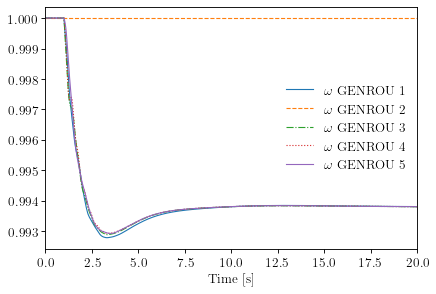

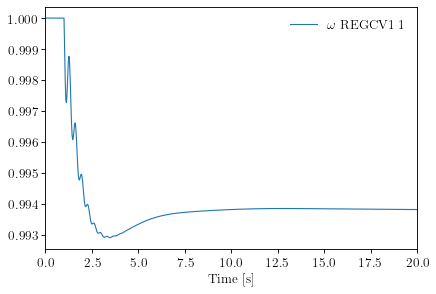

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [32]:
ssa.TDS.plt.plot(ssa.GENROU.omega)
ssa.TDS.plt.plot(ssa.REGCV1.omega)

hline1, hline2, vline1, and vline2 are deprecated. Use `hline` and `vline`.


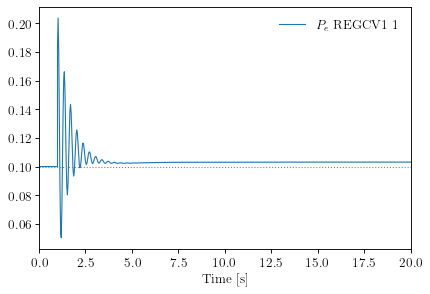

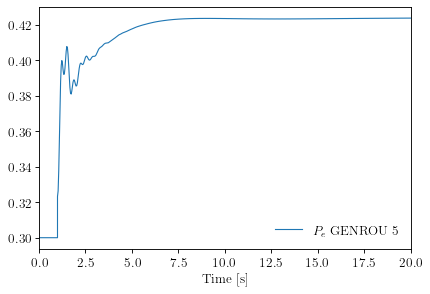

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [33]:
ssa.TDS.plt.plot(ssa.REGCV1.Pe, hline1=0.1)

ssa.TDS.plt.plot(ssa.GENROU.Pe, a=4)

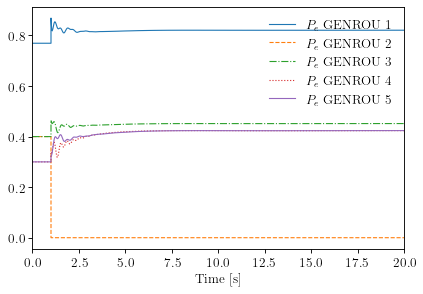

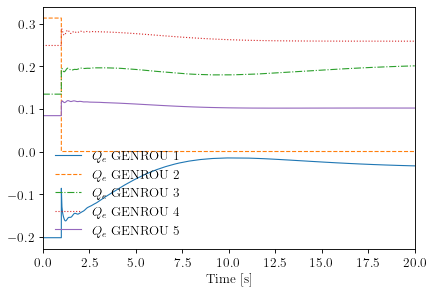

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [34]:
ssa.TDS.plt.plot(ssa.GENROU.Pe)
ssa.TDS.plt.plot(ssa.GENROU.Qe)

## Eigenvalue analysis

Singular matrix. Case is not solvable
/Users/buxinshe/Documents/git-repo/andes/andes/routines/eig.py:224: LinAlgWarning: Ill-conditioned matrix (rcond=3.03034e-21): result may not be accurate.
  WT = solve(N, Weye, overwrite_b=True)


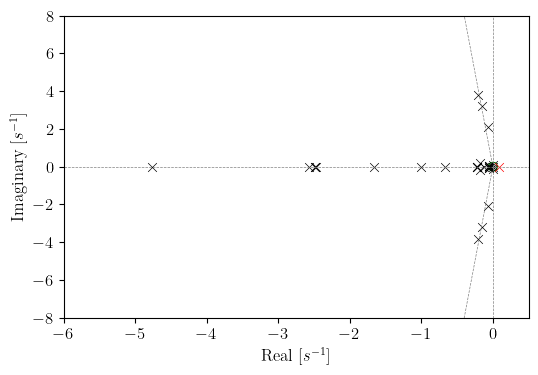

(<Figure size 600x400 with 1 Axes>,
 <AxesSubplot:xlabel='Real [$s^{-1}$]', ylabel='Imaginary [$s^{-1}$]'>)

In [35]:
ssa.EIG.run()
ssa.EIG.plot()